In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
cust=pd.read_csv('customer_data.csv')
internet=pd.read_csv('internet_data.csv')
churn_data=pd.read_csv('churn_data.csv')

In [5]:
for i in [cust,internet,churn_data]:
    print(list(i.columns))

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [7]:
print(cust.shape)
print(internet.shape)
print(churn_data.shape)

(7043, 5)
(7043, 9)
(7043, 9)


In [9]:
df=pd.merge(cust,internet,how='inner',on='customerID')
df=pd.merge(df,churn_data,how='inner',on='customerID')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,...,No,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## here we can see monthly charges in float and total charges in object
## we need to typecast it but we cant directly typecast it it will give error
## so we need to find out what thing made total charges in object datatype

In [13]:
df.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

## we can see some empty string presents in total charges column which made it as object datatype,so we need to put it as Nan or else we cant directly typecast it into float

In [24]:
df[df.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No phone service,DSL,Yes,No,Yes,...,Yes,No,0,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,...,Yes,Yes,0,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No phone service,DSL,Yes,Yes,Yes,...,Yes,No,0,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,...,No internet service,No internet service,0,Yes,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,DSL,No,Yes,Yes,...,Yes,No,0,Yes,Two year,No,Mailed check,73.35,,No


In [15]:
df.TotalCharges=np.where(df.TotalCharges==' ',np.nan,df.TotalCharges)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Fiber optic,No,No,No,...,No,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
df[df.TotalCharges==' ']## now we have no empty string 

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
df.TotalCharges=df.TotalCharges.astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## After typecast it,Now we can see bothe Monthly charges and TotalCharges datatype same as float

<Axes: xlabel='TotalCharges'>

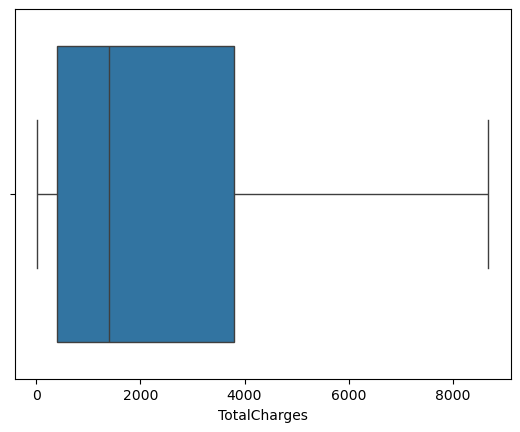

In [23]:
## annalysing the totalcharges to fix the missing value

sns.boxplot(df.TotalCharges,orient='h')

### its a right skewed data and no outliers
### Since its a skewed data hence we can fill null values with median

In [25]:
df.TotalCharges=df.TotalCharges.fillna(df.TotalCharges.median())

In [27]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Now we can see all Null values get filled with its median

## Checking Class imbalanced

In [29]:
df.Churn.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

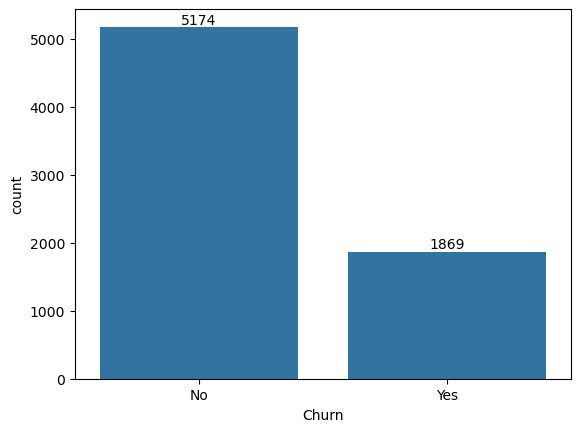

In [31]:
ax=sns.countplot(x=df['Churn'])
plt.bar_label(ax.containers[0])

([<matplotlib.patches.Wedge at 0x24922e53590>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.46%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.54%')])

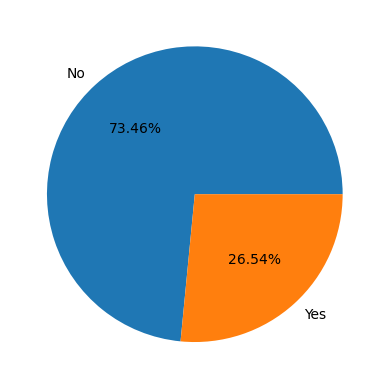

In [33]:
plt.pie(df.Churn.value_counts(),labels=df.Churn.value_counts().index,autopct='%.2f%%')

### its the case of class imbalanced

In [37]:
## create two different list of column that is categorical col and non-categorical col
cat_col=df.select_dtypes('object').columns.to_list()

In [39]:
num_col=[i for i in df.columns if i not in cat_col]

In [41]:
cat_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [43]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

## Annalysing the categorical variable

In [135]:
plot_cols=[i for i in cat_col if i not in ['customerID','Churn']]#customerID,Churn we can avoid 

In [137]:
plot_cols

['gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

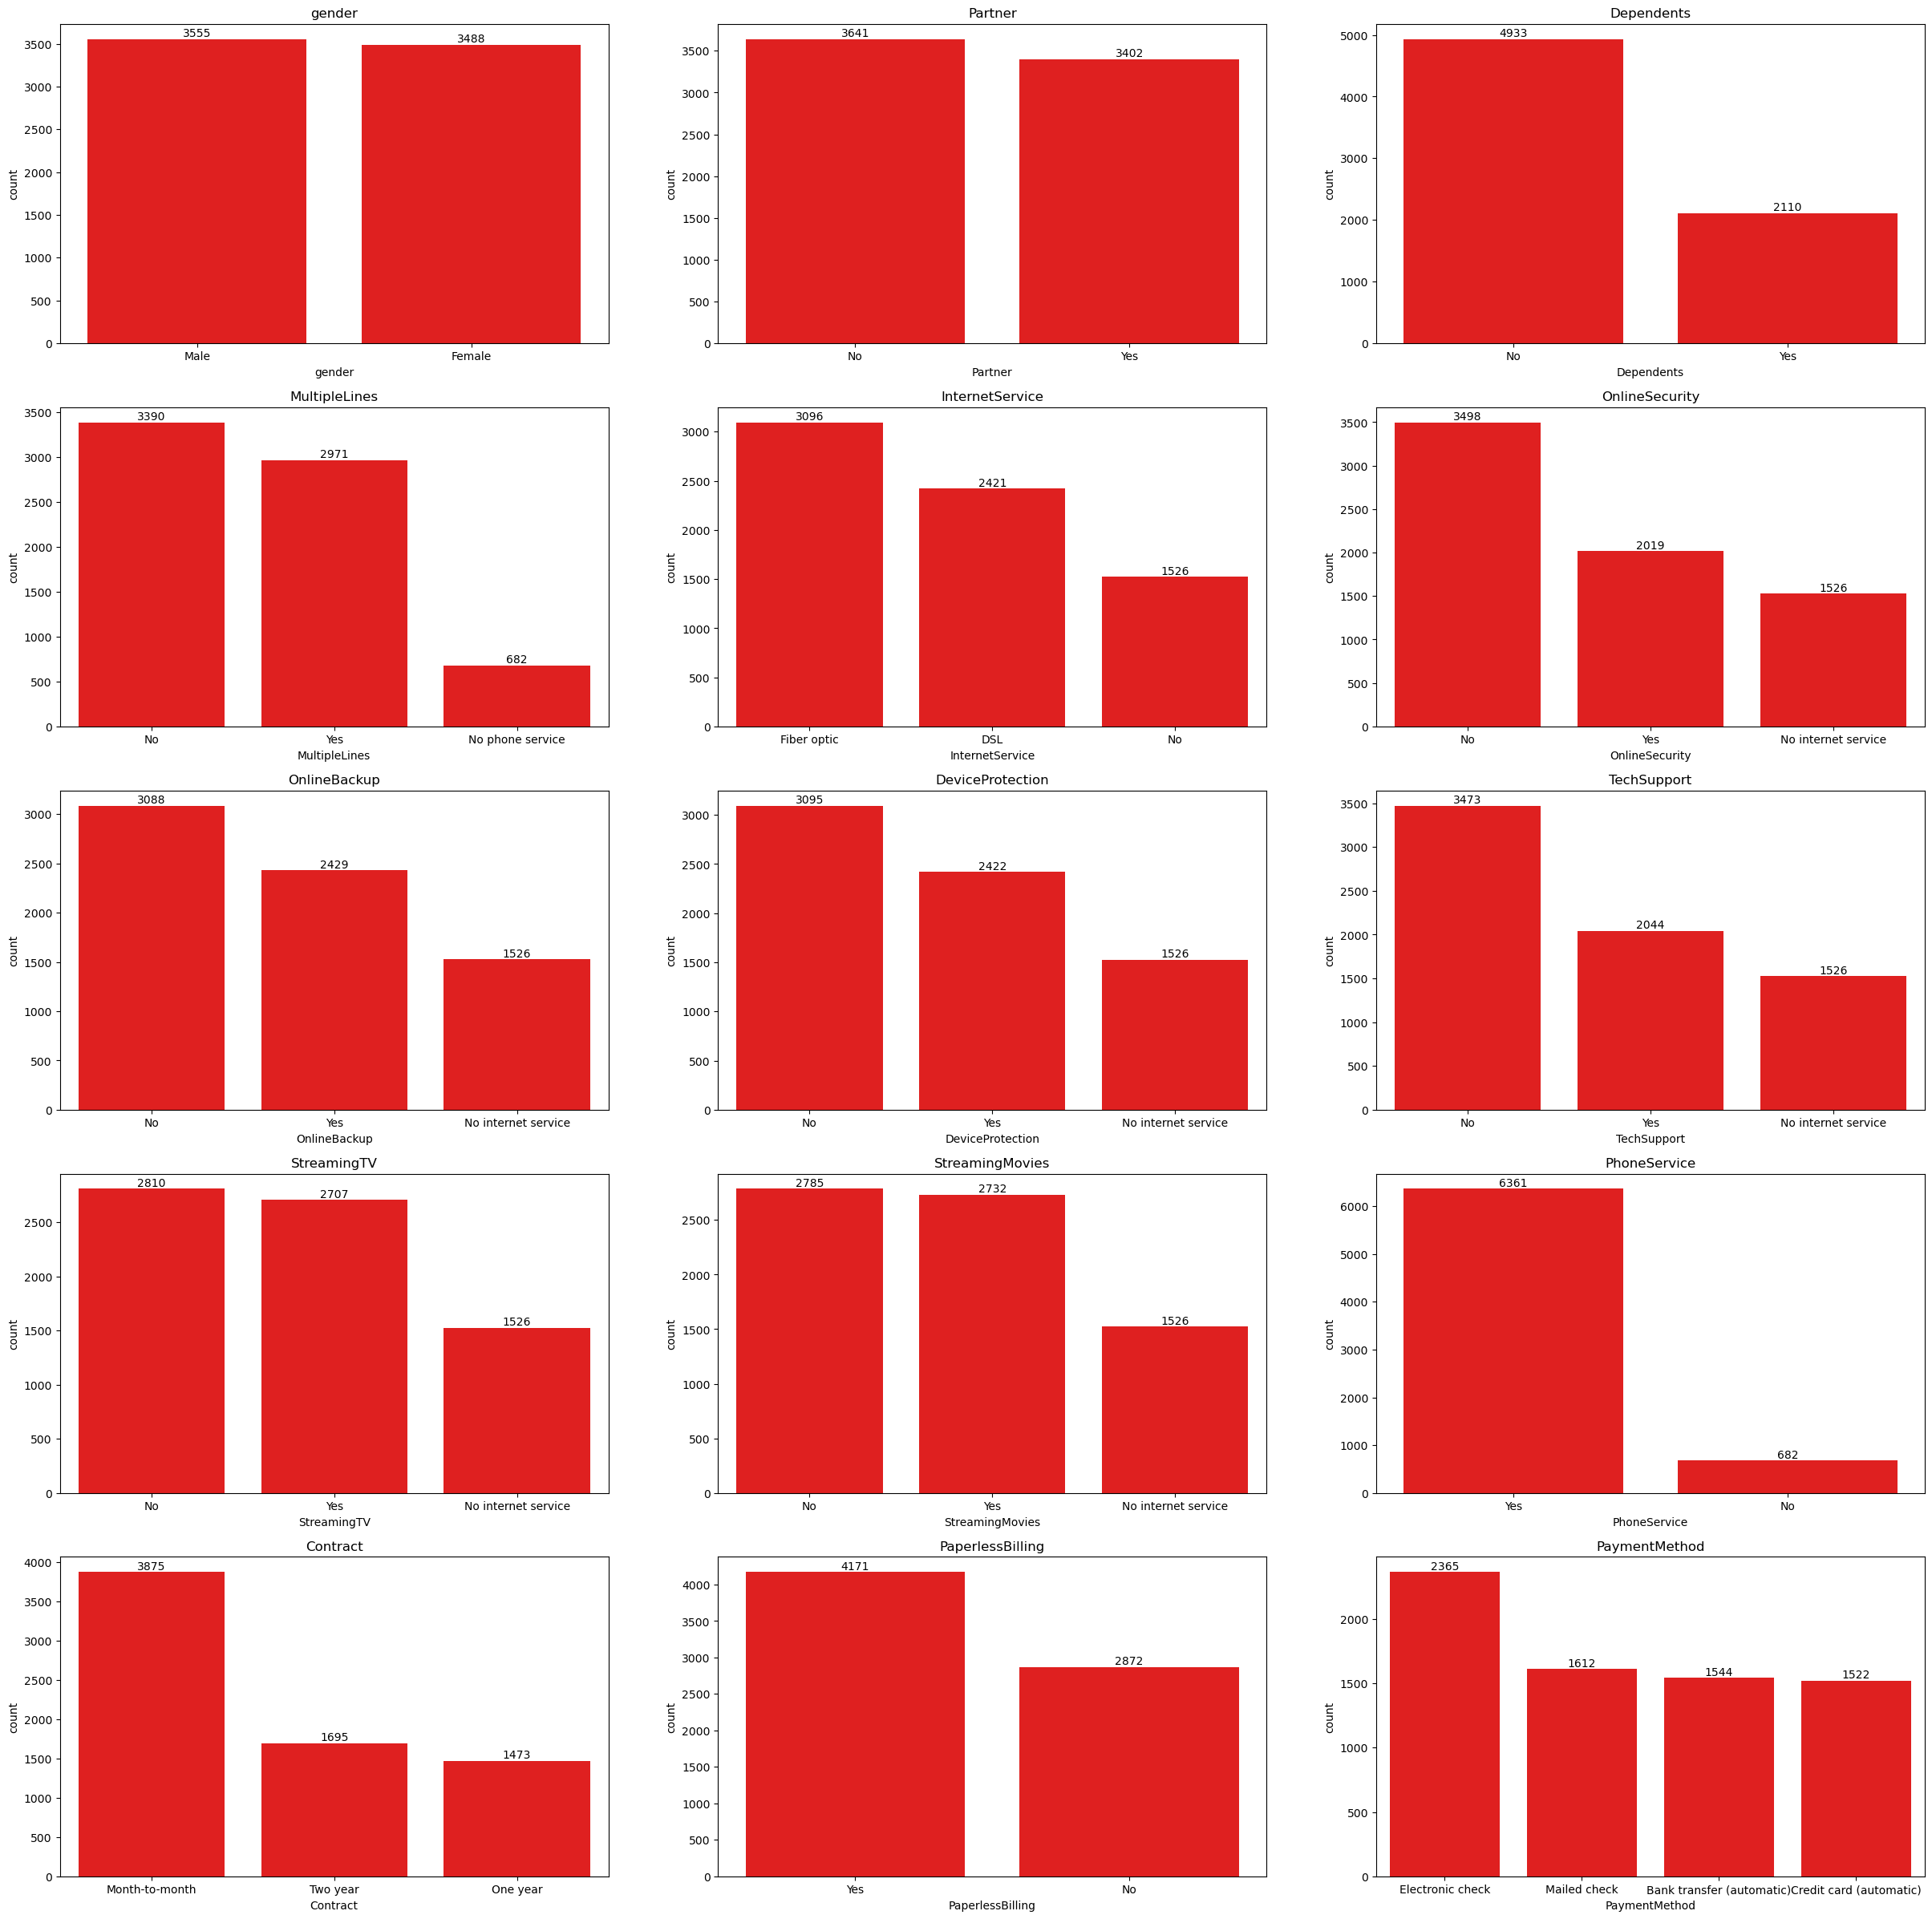

In [236]:


fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(30,30))
axes=axes.flatten()## it can convert to 1D array
for i,col in enumerate(plot_cols):
    ax=axes[i]
    cnt=sns.countplot(x=df[col],ax=ax,order=df[col].value_counts().index,color='red')
    ax.bar_label(cnt.containers[0])
    ax.set_title(col)
    


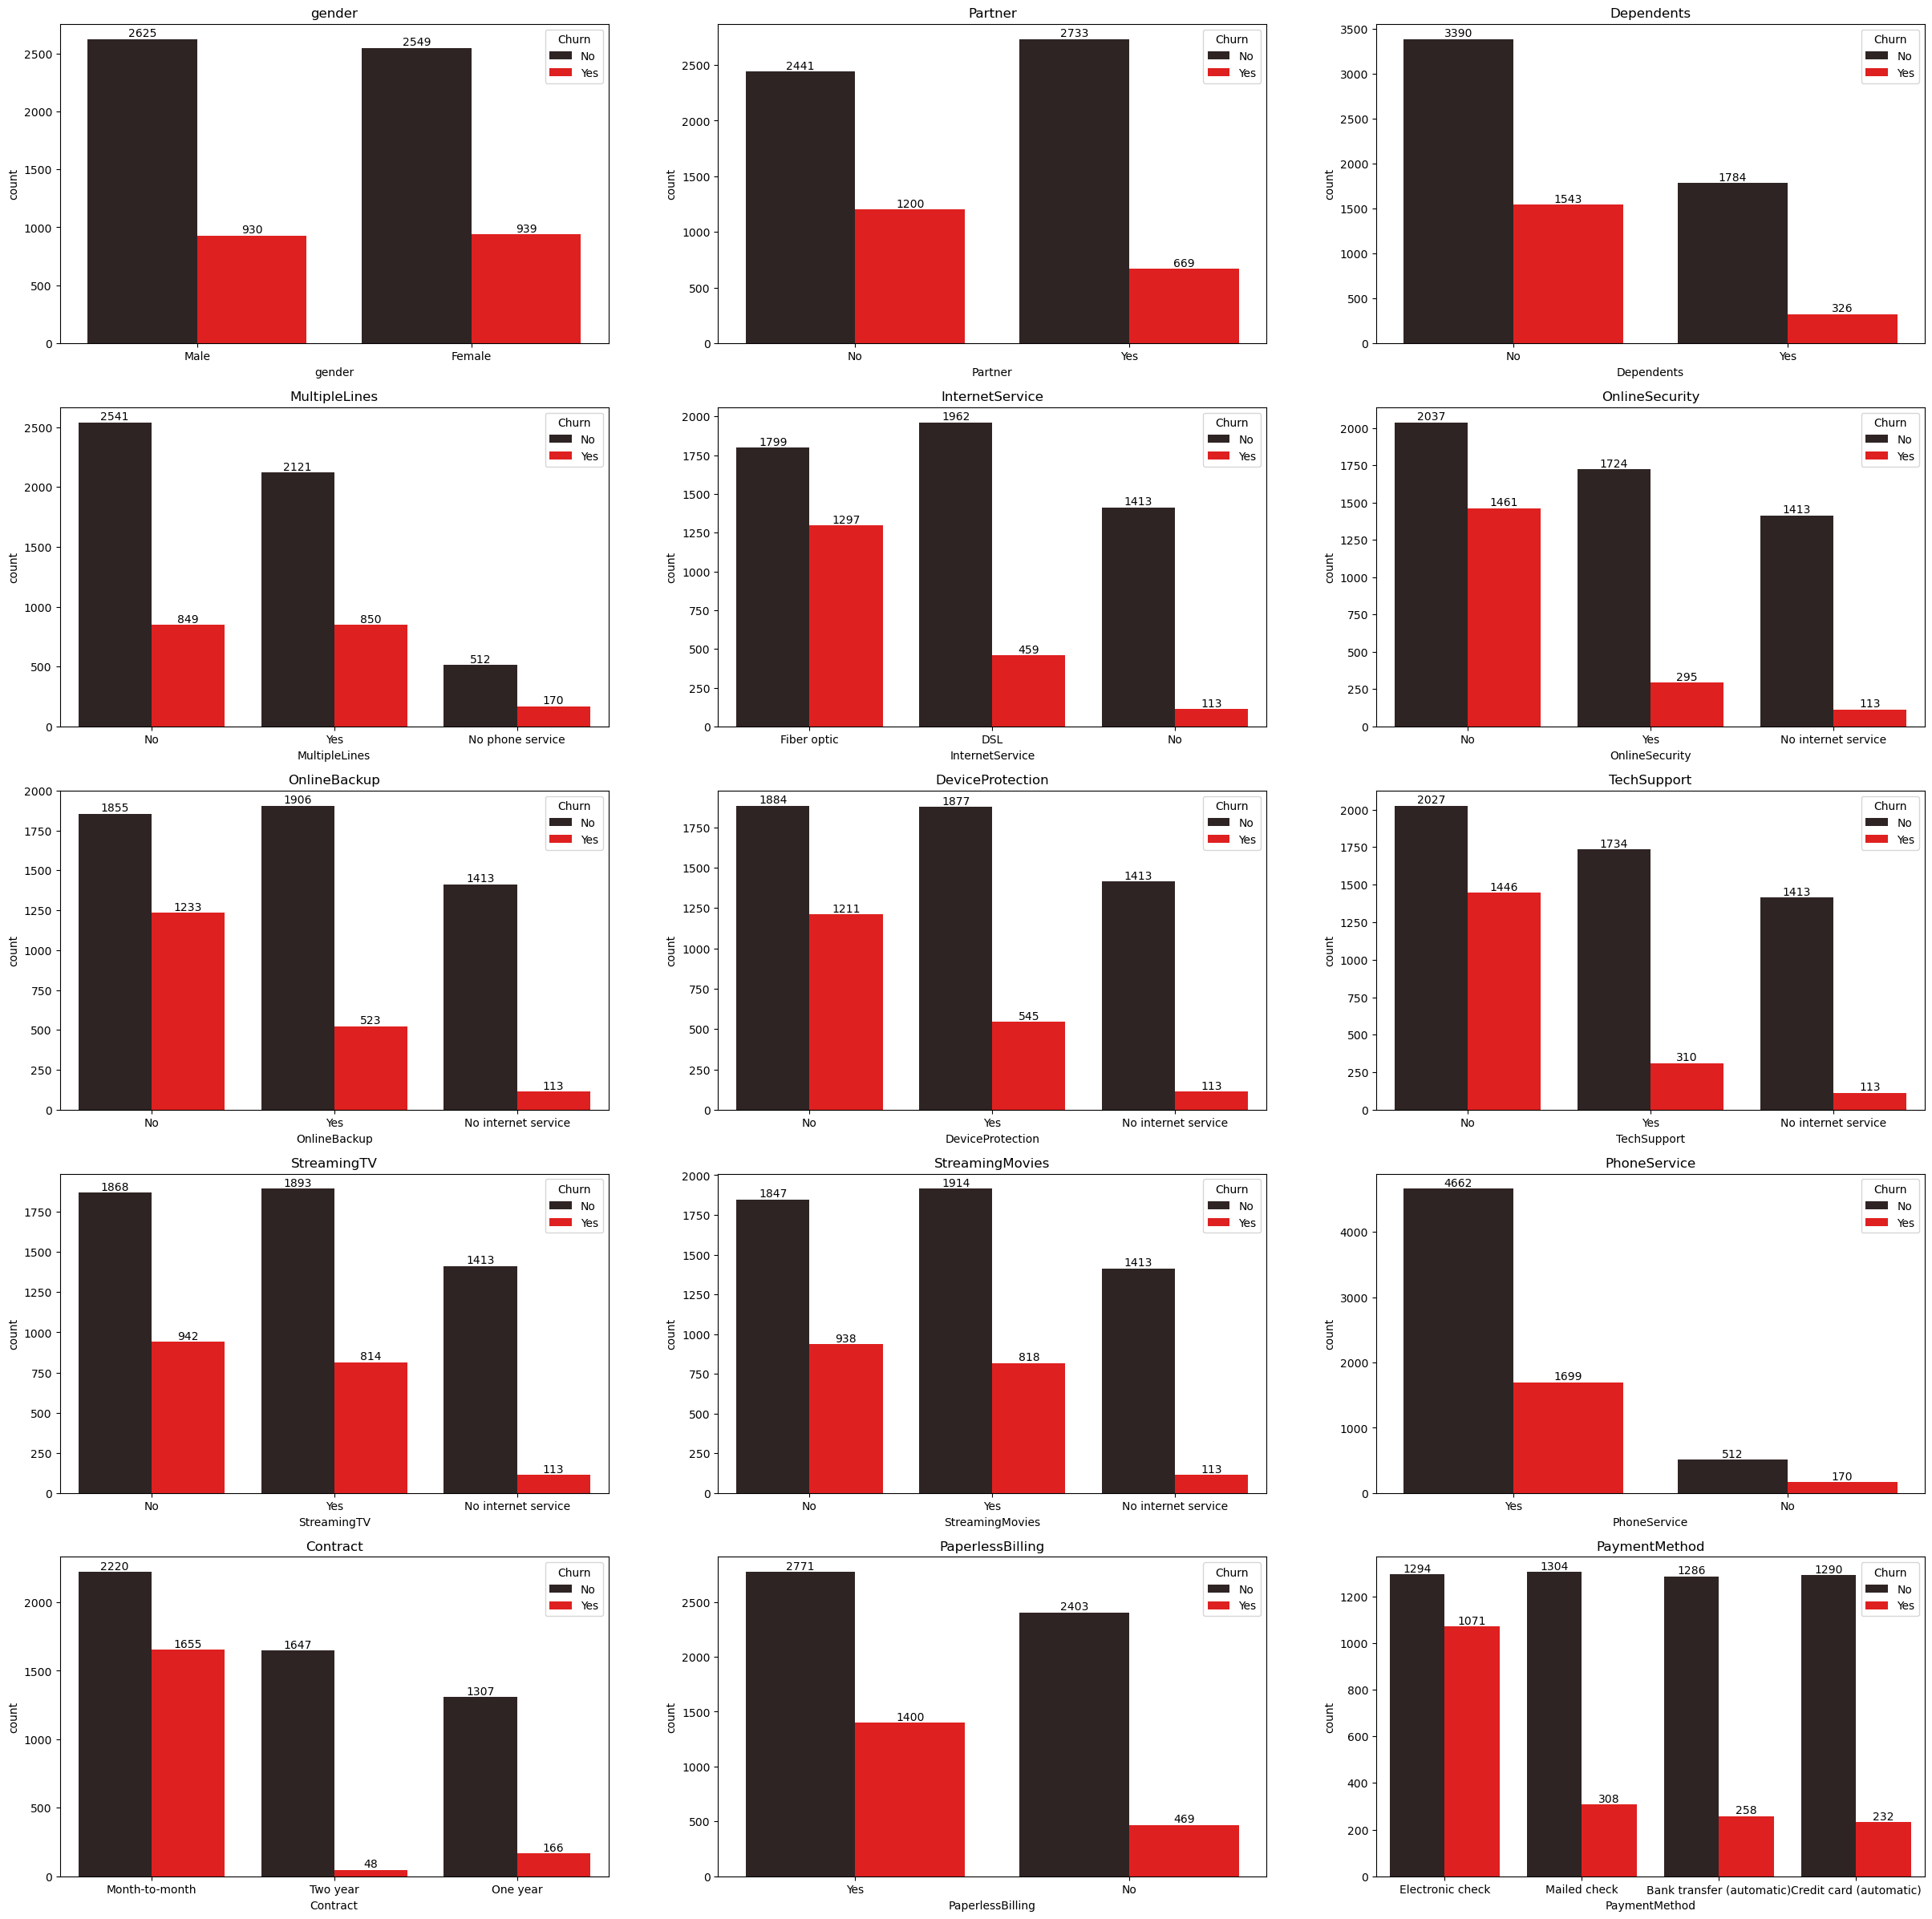

In [238]:
fig,axes=plt.subplots(nrows=5,ncols=3,figsize=(30,30))
axes=axes.flatten()
for i,col in enumerate(plot_cols):
    ax=axes[i]
    cnt=sns.countplot(x=df[col],ax=ax,order=df[col].value_counts().index,color='red',hue=df['Churn'])
    ax.bar_label(cnt.containers[0])
    ax.bar_label(cnt.containers[1])
    ax.set_title(col)

In [ ]:
## here we can annalyse from contract plot that if we will convert customer from month to month subscription to one year or two year 
##then our churn can be less 

# Annalyzing Numerical columns

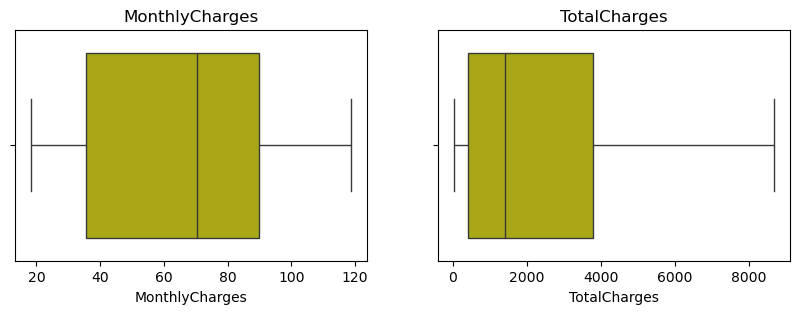

In [61]:
new_plot_cols=['MonthlyCharges', 'TotalCharges']
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
axes=axes.flatten()
for i,col in enumerate(new_plot_cols):
    ax=axes[i]
    cnt=sns.boxplot(x=df[col],ax=ax,color='y',orient='h')
    ax.set_title(col)

In [ ]:
# no outlier

## Now start with ML

In [63]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df=df.drop(columns=['customerID'])#id not required for algorithm 
df.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [252]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [67]:
#encoded
encoded_data=pd.get_dummies(df,drop_first=True,dtype='int')
encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1


<Axes: >

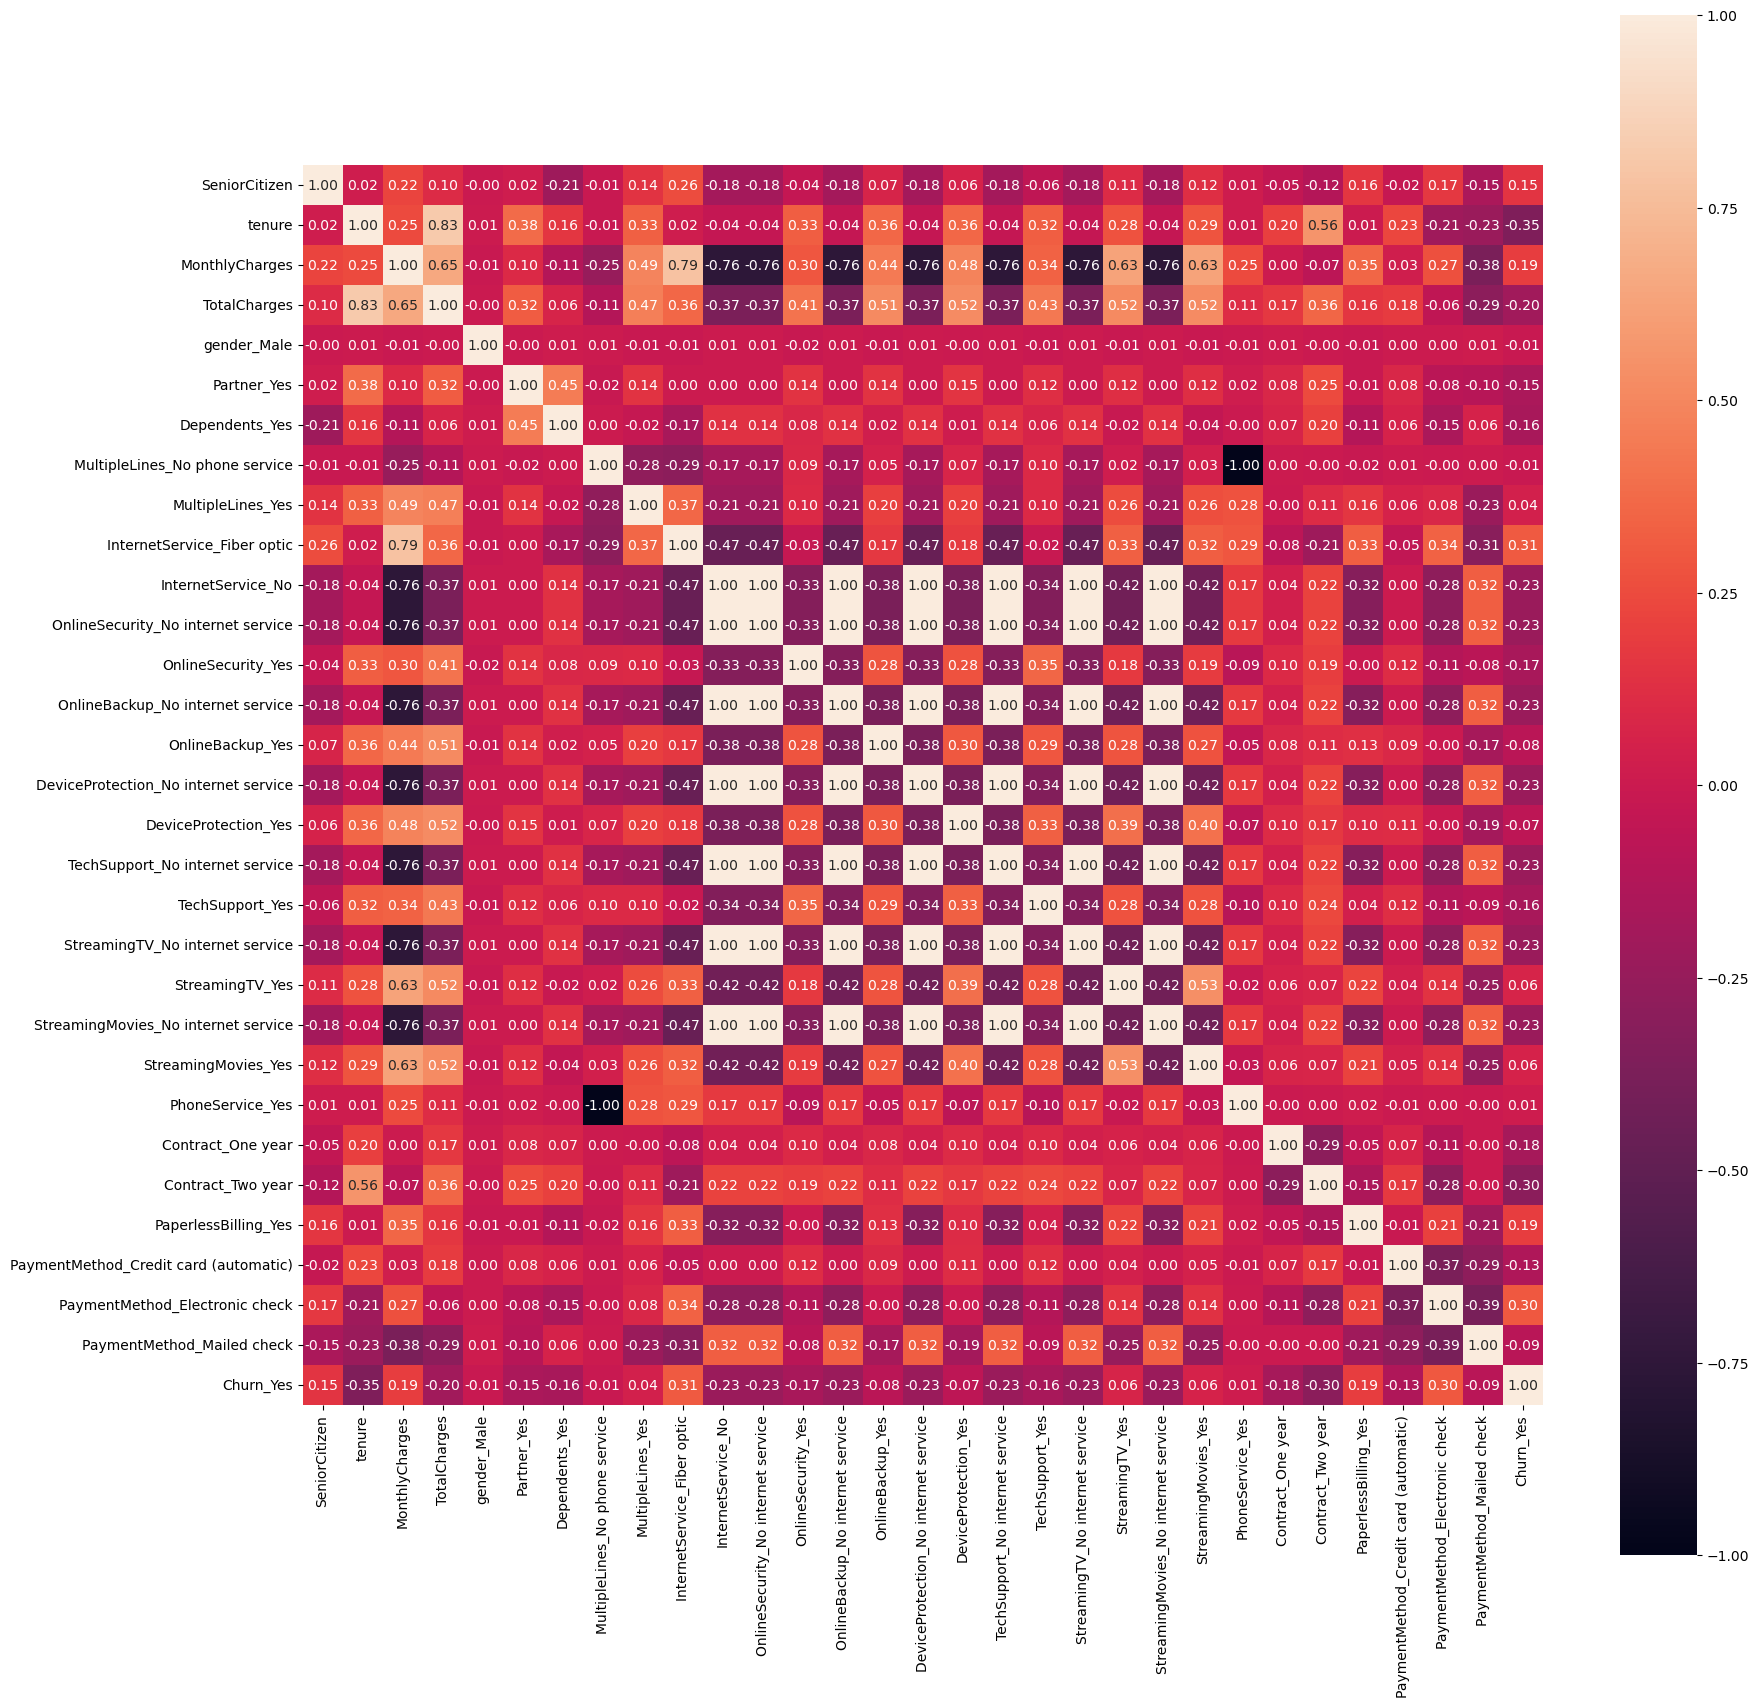

In [262]:
## multicolinearity check
plt.figure(figsize=(20,20))
sns.heatmap(encoded_data.corr(),square=True,annot=True,fmt='.2f')

### Here some multicolinearity found

# Without getting solution of multicolinearity lets try to build the model

In [75]:
#split dependent and indepedent column
x=encoded_data.drop(columns='Churn_Yes')
y=encoded_data['Churn_Yes']



In [77]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,0,1,0,...,1,0,1,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,0,1,1,...,1,0,1,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1


In [79]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=['tenure','MonthlyCharges','TotalCharges']#only these columns need to be standardised.
x[cols]=ss.fit_transform(x[cols])


In [81]:
#standardised x
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.173244,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.959674,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.194766,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.940470,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.128655,1,1,1,0,1,0,...,1,0,1,1,1,0,1,0,0,1
7039,0,1.613701,1.277533,2.243151,0,1,1,0,1,1,...,1,0,1,1,1,0,1,1,0,0
7040,0,-0.870241,-1.168632,-0.854469,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,-1.155283,0.320338,-0.872062,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1


In [83]:
# Handling imbalance data set by using SMOTE Techniques
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

Churn_Yes
0    5174
1    5174
Name: count, dtype: int64


# Building model

In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=45)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,f1_score,roc_auc_score

In [176]:
#train and evaluate the model by creating one method

def evaluate_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    if hasattr(model,"predict_proba"):# logistic and naive
        y_pred_proba=model.predict_proba(x_test)[:,1]
    else:# others
        y_pred_proba=y_pred
    
    #evaluation
    acc=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1_sc=f1_score(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred_proba)
    return {'accuracy':acc,'precision':precision,'recall':recall,'f1_score':f1_sc,'ROC AUC':auc}

result={}

In [178]:
#logistic regression
lr=LogisticRegression(max_iter=1000,random_state=42)
result['Logistic_Regression']=evaluate_model(lr)

In [180]:
#DT
dt=DecisionTreeClassifier(random_state=42)
result['DecisionTree']=evaluate_model(dt)

In [182]:
#RandomForest
rf=RandomForestClassifier(n_estimators=100,random_state=42)
result['RandomForest']=evaluate_model(rf)

In [184]:
#SVM
svm=SVC(probability=True,random_state=42)
result['SVM']=evaluate_model(svm)

In [186]:
#naivebays
nb=GaussianNB()
result['NaiveBays']=evaluate_model(nb)

In [188]:
#KNN
knn=KNeighborsClassifier(n_neighbors=5)
result['KNN']=evaluate_model(knn)

In [190]:
#xgb
xg=XGBClassifier()
result['xgboost']=evaluate_model(xg)

In [192]:
# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc=VotingClassifier(estimators=[('logre',lr), ('dtree',dt), ('rforest',rf),('xgboost',xg),
                                           ('knn',knn),('svm',svm),('nbt',nb)])

result['voting_classifier']=evaluate_model(model_evc)

In [194]:
disp_res=pd.DataFrame(result).T
disp_res

,accuracy,precision,recall,f1_score,ROC AUC
Logistic_Regression,0.796135,0.772208,0.843420,0.806244,0.881088
DecisionTree,0.778261,0.775047,0.787704,0.781324,0.778618
RandomForest,0.842512,0.815534,0.887608,0.850046,0.917327
SVM,0.797585,0.777679,0.836695,0.806108,0.879213
NaiveBays,0.740580,0.690620,0.877041,0.772747,0.828582
KNN,0.791304,0.734411,0.916427,0.815385,0.875570
xgboost,0.827053,0.806278,0.863593,0.833952,0.906114
voting_classifier,0.822222,0.785896,0.888569,0.834085,0.821835


In [ ]:
# Here Random forest has best accuracy

In [196]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

print('Acc of train :',accuracy_score(y_train,y_train_pred))
print('Acc of test :',accuracy_score(y_test,y_test_pred))

Acc of train : 0.9987919787388259
Acc of test : 0.842512077294686


In [198]:
# cross validation
from sklearn.model_selection import cross_val_score

training=cross_val_score(rf,x_train,y_train,cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Test Accuracy :",accuracy_score(y_test,y_test_pred))

Training Accuracy : 0.8381267195906279
***************
Test Accuracy : 0.842512077294686
